In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline

import os

In [2]:
import requests
from pandas.tools.plotting import scatter_matrix

from sklearn import model_selection as cv
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import Ridge
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [5]:
DATA_ROOT = 'Data'
DB_NAME = 'amiunique-1month-aug17.sqlite3.db'

PATH_TO_DB = os.path.join(DATA_ROOT, DB_NAME)

In [6]:
con = sqlite3.connect(PATH_TO_DB)
df = pd.read_sql_query('select * from fpData', con)

In [7]:
df.dtypes

counter              int64
id                  object
addressHttp         object
time                object
userAgentHttp       object
acceptHttp          object
hostHttp            object
connectionHttp      object
encodingHttp        object
languageHttp        object
orderHttp           object
pluginsJS           object
platformJS          object
cookiesJS           object
dntJS               object
timezoneJS          object
resolutionJS        object
localJS             object
sessionJS           object
IEDataJS            object
canvasJS            object
webGLJs             object
fontsFlash          object
resolutionFlash     object
languageFlash       object
platformFlash       object
adBlock             object
vendorWebGLJS       object
rendererWebGLJS     object
octaneScore         object
sunspiderTime       object
pluginsJSHashed     object
canvasJSHashed      object
webGLJsHashed       object
fontsFlashHashed    object
dtype: object

In [8]:
df.describe()

,counter
count,26110.0000
mean,439855.5000
std,7537.4521
min,426801.0000
25%,433328.2500
50%,439855.5000
75%,446382.7500
max,452910.0000


In [9]:
X = df.drop('userAgentHttp', axis=1)
y = df['userAgentHttp']


In [10]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(input_column):
    label_obj = LabelEncoder()
    label_obj.fit(input_column)
    return list(label_obj.transform(input_column))

In [11]:
X = pd.get_dummies(X)

In [12]:
y= label_encoder(y)

In [17]:
from sklearn.model_selection import train_test_split as tts 

X_train, X_test, y_train, y_test = tts(X,y, test_size=.9999)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [19]:
model = GaussianNB()

In [20]:
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [21]:
model.score(X_test, y_test)

0.0084648383637199332

In [22]:
from sklearn.metrics import classification_report

In [23]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        40
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         1
          5       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         1
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         1
         11       0.00      0.00      0.00         1
         12       0.00      0.00      0.00         1
         13       0.00      0.00      0.00         2
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00       172
         17       0.00      0.00      0.00   

/Users/alexisvstarr/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

0.00834993105562
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        40
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         1
          5       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         1
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         1
         11       0.00      0.00      0.00         1
         12       0.00      0.00      0.00         1
         13       0.00      0.00      0.00         2
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00       172
         17       0.00      

/Users/alexisvstarr/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/Users/alexisvstarr/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


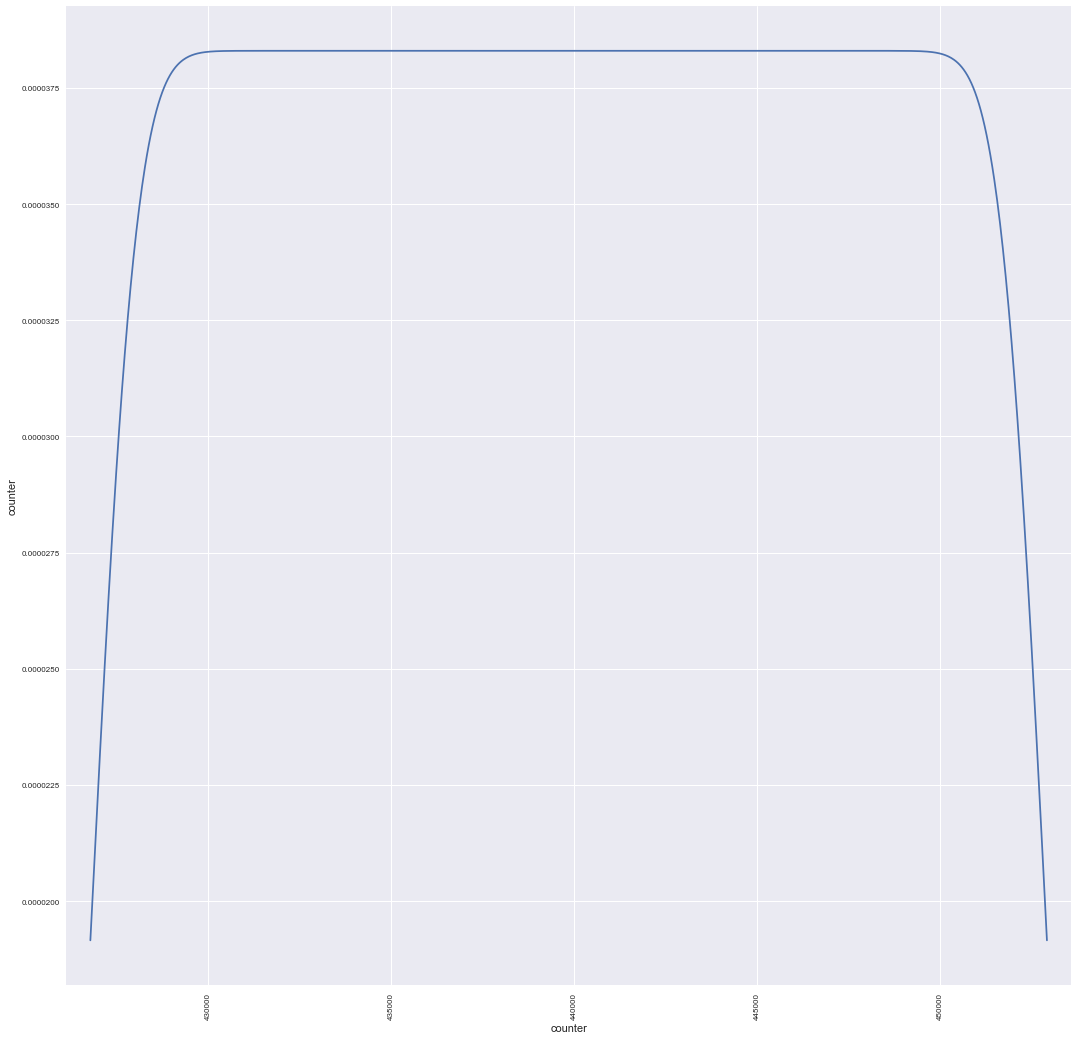

In [26]:
scatter_matrix(df, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [27]:
data_features = X
data_labels = y

In [ ]:
model = RandomizedLasso(alpha=0.001)
model.fit(data_features, data_labels)
names = list(data_features)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), model.scores_), 
                 names), reverse=True))

In [ ]:
heat_labels = X

In [ ]:
splits = cv.train_test_split(data_features, heat_labels, test_size=0.2)
X_train, X_test, y_train, y_test = splits

In [ ]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Ridge Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Random Forest model")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))